<h1>Getting the Environment Set Up</h1>

We will be using tensorflow to create and use our neural networks. Throughout this notebook, we will see just how easy it is to make a working neural network that has a surprisingly high accuary!

In [1]:
import tensorflow as tf
from tensorflow import keras

2022-06-14 20:44:07.867109: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-14 20:44:07.867160: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<h1>Managing our Images</h1>

In [19]:
# parameters
input_shape = (28, 28) # the image is 28x28
num_classes = 10 # 10 labels
num_epochs = 5 # 5 training iterations, we bump this down because the model takes longer to train

# TODO You can change to the numbers MNIST dataset if you'd like to see how it works on different images
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ("T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot")

# 60,000 images with each image being 28 by 28 pixels
train_images.shape

(60000, 28, 28)

In [18]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Each image is represented by a 2-D array where each number in the list represents the brightness of the pixel



In [11]:
train_images[0].shape

(28, 28, 1)

For our CNN model, we will need this to be a 3-D array for it to work with tensorflow properly. Below we will reshape it to be 3D and then print it out again

In [21]:
train_images = train_images.reshape((60000,28,28,1))
# This just has a massive output, if you want to see the new shape, uncomment it and run this block
train_images.shape

(60000, 28, 28, 1)

We will also need to do this for our test images



In [22]:
test_images = test_images.reshape((10000, 28, 28, 1))

That wall of numbers isn't very easy to understand to our brains however. Lets go ahead and display a few of the images from the dataset with matplotlib. If you want to read more about matplot lib, you can go here: https://matplotlib.org/stable/users/index

In [31]:
import matplotlib.pyplot as plt
import numpy as np

def show_imgs():
    plt.figure(figsize=(10,10))
    for i in range(25):
        # Create a 5x5 grid of pictures, place current picture in the grid
        plt.subplot(5,5,i+1)
        # Remove the x and y ticks
        plt.xticks([])
        plt.yticks([])
        # Disable the grid in each picture, we dont want x/y axis for these
        plt.grid(True)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])
    plt.show()

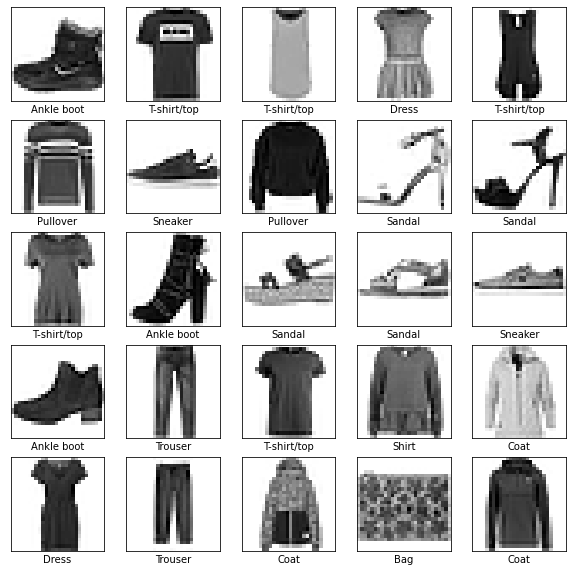

In [32]:
show_imgs()

<h1>Creating Our Model</h1>

Tensorflow lets us create a model super easily. A "Dense" layer is just a layer that is fully connected to the next layer, this is the basic type of layer that we are familiar with. Then all we need to do is specify how many neurons there should be in the given layer and tensorflow figures out the rest.

In [33]:
# The parameters in each of these Conv2D layers are as follows:
# layers.Conv2D(Output_size, Stride, activation, input_shape)
# Stride is just how far the square of relevant pixels moves between layers. 
# Simply put, for this model, the model looks at a 4x4 square of pixels and
# then moves 4 pixels to the left before checking the next 4x4 box of pixels
def create_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    # Max Pooling just grabs the largest number in a specified area and uses that for the whole area
    # below we are looking at a 2x2 square and using the largest number in that square as the value for the whole square

    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(56, (3, 3), activation='relu'))

    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(56, (3, 3), activation='relu'))
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(10))

    return model

In [34]:
model = create_model()
# The optimizer is just an algorithm that helps the AI learn faster
# The loss is Sparse Categorical Crossentropy, the name is scary but it just means that 
# the outputs are converted to percentages and then compared to the expected output
# Metrics = accuracy means that we only care about how close the answer was to the actual answer 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 26, 26, 28)        280       


 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         


 )                                                               


 conv2d_1 (Conv2D)           (None, 11, 11, 56)        14168     


 max_pooling2d_1 (MaxPooling  (None, 5, 5, 56)         0         


 2D)                                                             


 conv2d_2 (Conv2D)           (None, 3, 3, 56)          28280     


 flatten (Flatten)           (None, 504)               0         


 dense (Dense)               (None, 64)                32320     


 dense_1 (Dense)             (None, 10)                650       


Total params: 75,698


Trainable params: 75,698


Non-trainable params: 0


_________________________________________________________________


2022-06-14 21:11:33.374267: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-14 21:11:33.374306: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-14 21:11:33.374327: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (7c364c78bb87): /proc/driver/nvidia/version does not exist
2022-06-14 21:11:33.374591: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<h1>Training our Model</h1>

Tensorflow makes training easy. All we need to do is give it the input data and the expected outputs with the number of epochs to train for and it will handle the rest!

In [35]:
model.fit(train_images, train_labels, epochs=num_epochs)

Epoch 1/5


   1/1875 [..............................] - ETA: 22:07 - loss: 34.8678 - accuracy: 0.0312

   3/1875 [..............................] - ETA: 49s - loss: 23.8113 - accuracy: 0.0729  

   5/1875 [..............................] - ETA: 48s - loss: 18.9389 - accuracy: 0.1187

   7/1875 [..............................] - ETA: 48s - loss: 15.5400 - accuracy: 0.1250

   9/1875 [..............................] - ETA: 49s - loss: 13.3137 - accuracy: 0.1632

  12/1875 [..............................] - ETA: 46s - loss: 10.8300 - accuracy: 0.1953

  14/1875 [..............................] - ETA: 46s - loss: 9.7591 - accuracy: 0.2121 

  16/1875 [..............................] - ETA: 46s - loss: 8.7971 - accuracy: 0.2344

  17/1875 [..............................] - ETA: 49s - loss: 8.3952 - accuracy: 0.2500

  19/1875 [..............................] - ETA: 51s - loss: 7.7219 - accuracy: 0.2648

  20/1875 [..............................] - ETA: 54s - loss: 7.4193 - accuracy: 0.2719

  22/1875 [..............................] - ETA: 56s - loss: 6.8808 - accuracy: 0.2841

  24/1875 [..............................] - ETA: 55s - loss: 6.4708 - accuracy: 0.2943

  26/1875 [..............................] - ETA: 57s - loss: 6.0883 - accuracy: 0.3065

  27/1875 [..............................] - ETA: 59s - loss: 5.9035 - accuracy: 0.3125

  28/1875 [..............................] - ETA: 1:01 - loss: 5.7368 - accuracy: 0.3259

  30/1875 [..............................] - ETA: 1:01 - loss: 5.4411 - accuracy: 0.3427

  31/1875 [..............................] - ETA: 1:03 - loss: 5.2997 - accuracy: 0.3528

  33/1875 [..............................] - ETA: 1:02 - loss: 5.0519 - accuracy: 0.3665

  35/1875 [..............................] - ETA: 1:02 - loss: 4.8235 - accuracy: 0.3804

  37/1875 [..............................] - ETA: 1:01 - loss: 4.6109 - accuracy: 0.3978

  39/1875 [..............................] - ETA: 1:01 - loss: 4.4361 - accuracy: 0.4095

  41/1875 [..............................] - ETA: 1:00 - loss: 4.2701 - accuracy: 0.4223

  42/1875 [..............................] - ETA: 1:01 - loss: 4.1920 - accuracy: 0.4286

  44/1875 [..............................] - ETA: 1:01 - loss: 4.0442 - accuracy: 0.4403

  46/1875 [..............................] - ETA: 1:00 - loss: 3.9012 - accuracy: 0.4538

  48/1875 [..............................] - ETA: 1:00 - loss: 3.7872 - accuracy: 0.4609

  50/1875 [..............................] - ETA: 1:01 - loss: 3.6810 - accuracy: 0.4681

  52/1875 [..............................] - ETA: 1:00 - loss: 3.5752 - accuracy: 0.4748

  55/1875 [..............................] - ETA: 59s - loss: 3.4303 - accuracy: 0.4864 

  58/1875 [..............................] - ETA: 58s - loss: 3.3102 - accuracy: 0.4930

  61/1875 [..............................] - ETA: 57s - loss: 3.1846 - accuracy: 0.5056

  64/1875 [>.............................] - ETA: 56s - loss: 3.0882 - accuracy: 0.5122

  66/1875 [>.............................] - ETA: 55s - loss: 3.0198 - accuracy: 0.5189

  68/1875 [>.............................] - ETA: 55s - loss: 2.9585 - accuracy: 0.5239

  70/1875 [>.............................] - ETA: 55s - loss: 2.9021 - accuracy: 0.5277

  72/1875 [>.............................] - ETA: 55s - loss: 2.8469 - accuracy: 0.5330

  75/1875 [>.............................] - ETA: 54s - loss: 2.7660 - accuracy: 0.5387

  77/1875 [>.............................] - ETA: 54s - loss: 2.7198 - accuracy: 0.5418

  80/1875 [>.............................] - ETA: 54s - loss: 2.6508 - accuracy: 0.5473

  83/1875 [>.............................] - ETA: 53s - loss: 2.5914 - accuracy: 0.5520

  86/1875 [>.............................] - ETA: 52s - loss: 2.5280 - accuracy: 0.5603

  89/1875 [>.............................] - ETA: 52s - loss: 2.4655 - accuracy: 0.5667

  92/1875 [>.............................] - ETA: 51s - loss: 2.4140 - accuracy: 0.5720

  95/1875 [>.............................] - ETA: 51s - loss: 2.3651 - accuracy: 0.5734

  97/1875 [>.............................] - ETA: 50s - loss: 2.3357 - accuracy: 0.5751

  99/1875 [>.............................] - ETA: 51s - loss: 2.3060 - accuracy: 0.5770

 101/1875 [>.............................] - ETA: 51s - loss: 2.2790 - accuracy: 0.5792

 103/1875 [>.............................] - ETA: 50s - loss: 2.2495 - accuracy: 0.5822

 105/1875 [>.............................] - ETA: 50s - loss: 2.2184 - accuracy: 0.5839

 107/1875 [>.............................] - ETA: 50s - loss: 2.1903 - accuracy: 0.5867

 108/1875 [>.............................] - ETA: 51s - loss: 2.1775 - accuracy: 0.5877

 110/1875 [>.............................] - ETA: 51s - loss: 2.1504 - accuracy: 0.5909

 112/1875 [>.............................] - ETA: 51s - loss: 2.1211 - accuracy: 0.5954

 115/1875 [>.............................] - ETA: 50s - loss: 2.0886 - accuracy: 0.5986

 118/1875 [>.............................] - ETA: 50s - loss: 2.0537 - accuracy: 0.6025

 121/1875 [>.............................] - ETA: 50s - loss: 2.0204 - accuracy: 0.6069

 123/1875 [>.............................] - ETA: 50s - loss: 1.9979 - accuracy: 0.6105

 125/1875 [=>............................] - ETA: 50s - loss: 1.9786 - accuracy: 0.6115

 127/1875 [=>............................] - ETA: 50s - loss: 1.9610 - accuracy: 0.6132

 129/1875 [=>............................] - ETA: 50s - loss: 1.9405 - accuracy: 0.6153

 131/1875 [=>............................] - ETA: 50s - loss: 1.9258 - accuracy: 0.6164

 133/1875 [=>............................] - ETA: 50s - loss: 1.9124 - accuracy: 0.6165

 135/1875 [=>............................] - ETA: 50s - loss: 1.8974 - accuracy: 0.6171

 137/1875 [=>............................] - ETA: 51s - loss: 1.8832 - accuracy: 0.6184

 139/1875 [=>............................] - ETA: 51s - loss: 1.8686 - accuracy: 0.6210

 141/1875 [=>............................] - ETA: 51s - loss: 1.8563 - accuracy: 0.6215

 142/1875 [=>............................] - ETA: 51s - loss: 1.8473 - accuracy: 0.6219

 144/1875 [=>............................] - ETA: 51s - loss: 1.8342 - accuracy: 0.6233

 146/1875 [=>............................] - ETA: 51s - loss: 1.8198 - accuracy: 0.6241

 148/1875 [=>............................] - ETA: 51s - loss: 1.8056 - accuracy: 0.6261

 151/1875 [=>............................] - ETA: 51s - loss: 1.7850 - accuracy: 0.6281

 153/1875 [=>............................] - ETA: 51s - loss: 1.7729 - accuracy: 0.6289

 156/1875 [=>............................] - ETA: 50s - loss: 1.7529 - accuracy: 0.6302

 159/1875 [=>............................] - ETA: 50s - loss: 1.7332 - accuracy: 0.6323

 161/1875 [=>............................] - ETA: 50s - loss: 1.7206 - accuracy: 0.6337

 164/1875 [=>............................] - ETA: 50s - loss: 1.7008 - accuracy: 0.6361

 166/1875 [=>............................] - ETA: 50s - loss: 1.6902 - accuracy: 0.6372

 168/1875 [=>............................] - ETA: 50s - loss: 1.6785 - accuracy: 0.6386

 171/1875 [=>............................] - ETA: 49s - loss: 1.6595 - accuracy: 0.6416

 174/1875 [=>............................] - ETA: 49s - loss: 1.6405 - accuracy: 0.6442

 175/1875 [=>............................] - ETA: 49s - loss: 1.6338 - accuracy: 0.6452

 177/1875 [=>............................] - ETA: 49s - loss: 1.6236 - accuracy: 0.6458

 180/1875 [=>............................] - ETA: 49s - loss: 1.6099 - accuracy: 0.6469

 183/1875 [=>............................] - ETA: 49s - loss: 1.5955 - accuracy: 0.6481

 186/1875 [=>............................] - ETA: 48s - loss: 1.5796 - accuracy: 0.6500

 189/1875 [==>...........................] - ETA: 48s - loss: 1.5628 - accuracy: 0.6528

 192/1875 [==>...........................] - ETA: 48s - loss: 1.5485 - accuracy: 0.6548

 194/1875 [==>...........................] - ETA: 48s - loss: 1.5409 - accuracy: 0.6561

 196/1875 [==>...........................] - ETA: 48s - loss: 1.5313 - accuracy: 0.6569

 198/1875 [==>...........................] - ETA: 48s - loss: 1.5248 - accuracy: 0.6572

 201/1875 [==>...........................] - ETA: 47s - loss: 1.5110 - accuracy: 0.6587

 202/1875 [==>...........................] - ETA: 48s - loss: 1.5068 - accuracy: 0.6597

 205/1875 [==>...........................] - ETA: 47s - loss: 1.4924 - accuracy: 0.6611

 207/1875 [==>...........................] - ETA: 47s - loss: 1.4858 - accuracy: 0.6618

 209/1875 [==>...........................] - ETA: 47s - loss: 1.4763 - accuracy: 0.6636

 211/1875 [==>...........................] - ETA: 47s - loss: 1.4676 - accuracy: 0.6648

 212/1875 [==>...........................] - ETA: 48s - loss: 1.4634 - accuracy: 0.6654

 214/1875 [==>...........................] - ETA: 47s - loss: 1.4580 - accuracy: 0.6665

 217/1875 [==>...........................] - ETA: 47s - loss: 1.4462 - accuracy: 0.6675

 219/1875 [==>...........................] - ETA: 47s - loss: 1.4385 - accuracy: 0.6684

 221/1875 [==>...........................] - ETA: 47s - loss: 1.4313 - accuracy: 0.6694

 223/1875 [==>...........................] - ETA: 47s - loss: 1.4232 - accuracy: 0.6704

 226/1875 [==>...........................] - ETA: 47s - loss: 1.4127 - accuracy: 0.6716

 229/1875 [==>...........................] - ETA: 47s - loss: 1.4033 - accuracy: 0.6725

 231/1875 [==>...........................] - ETA: 46s - loss: 1.3956 - accuracy: 0.6741

 234/1875 [==>...........................] - ETA: 46s - loss: 1.3832 - accuracy: 0.6767

 237/1875 [==>...........................] - ETA: 46s - loss: 1.3719 - accuracy: 0.6781

 239/1875 [==>...........................] - ETA: 46s - loss: 1.3642 - accuracy: 0.6791

 241/1875 [==>...........................] - ETA: 46s - loss: 1.3591 - accuracy: 0.6793

 243/1875 [==>...........................] - ETA: 46s - loss: 1.3540 - accuracy: 0.6798

 245/1875 [==>...........................] - ETA: 46s - loss: 1.3487 - accuracy: 0.6805

 247/1875 [==>...........................] - ETA: 46s - loss: 1.3424 - accuracy: 0.6816

 250/1875 [===>..........................] - ETA: 46s - loss: 1.3364 - accuracy: 0.6819

 252/1875 [===>..........................] - ETA: 46s - loss: 1.3311 - accuracy: 0.6830

 254/1875 [===>..........................] - ETA: 46s - loss: 1.3247 - accuracy: 0.6841

 257/1875 [===>..........................] - ETA: 45s - loss: 1.3157 - accuracy: 0.6856

 259/1875 [===>..........................] - ETA: 45s - loss: 1.3105 - accuracy: 0.6856

 261/1875 [===>..........................] - ETA: 45s - loss: 1.3041 - accuracy: 0.6863

 264/1875 [===>..........................] - ETA: 45s - loss: 1.2953 - accuracy: 0.6880

 266/1875 [===>..........................] - ETA: 45s - loss: 1.2896 - accuracy: 0.6890

 268/1875 [===>..........................] - ETA: 45s - loss: 1.2854 - accuracy: 0.6897

 270/1875 [===>..........................] - ETA: 45s - loss: 1.2799 - accuracy: 0.6904

 273/1875 [===>..........................] - ETA: 45s - loss: 1.2712 - accuracy: 0.6922

 275/1875 [===>..........................] - ETA: 45s - loss: 1.2671 - accuracy: 0.6927

 277/1875 [===>..........................] - ETA: 45s - loss: 1.2629 - accuracy: 0.6931

 280/1875 [===>..........................] - ETA: 44s - loss: 1.2556 - accuracy: 0.6941

 282/1875 [===>..........................] - ETA: 44s - loss: 1.2525 - accuracy: 0.6939

 284/1875 [===>..........................] - ETA: 44s - loss: 1.2488 - accuracy: 0.6942

 287/1875 [===>..........................] - ETA: 44s - loss: 1.2415 - accuracy: 0.6954

 289/1875 [===>..........................] - ETA: 44s - loss: 1.2371 - accuracy: 0.6963

 291/1875 [===>..........................] - ETA: 44s - loss: 1.2359 - accuracy: 0.6959

 293/1875 [===>..........................] - ETA: 44s - loss: 1.2326 - accuracy: 0.6961

 294/1875 [===>..........................] - ETA: 44s - loss: 1.2305 - accuracy: 0.6965

 296/1875 [===>..........................] - ETA: 44s - loss: 1.2258 - accuracy: 0.6975

 298/1875 [===>..........................] - ETA: 44s - loss: 1.2226 - accuracy: 0.6979

 301/1875 [===>..........................] - ETA: 44s - loss: 1.2144 - accuracy: 0.6991

 303/1875 [===>..........................] - ETA: 44s - loss: 1.2115 - accuracy: 0.6994

 305/1875 [===>..........................] - ETA: 44s - loss: 1.2076 - accuracy: 0.6999

 307/1875 [===>..........................] - ETA: 44s - loss: 1.2027 - accuracy: 0.7010

 309/1875 [===>..........................] - ETA: 44s - loss: 1.1990 - accuracy: 0.7017

 311/1875 [===>..........................] - ETA: 44s - loss: 1.1948 - accuracy: 0.7021

 313/1875 [====>.........................] - ETA: 44s - loss: 1.1905 - accuracy: 0.7028

 315/1875 [====>.........................] - ETA: 44s - loss: 1.1881 - accuracy: 0.7032

 317/1875 [====>.........................] - ETA: 44s - loss: 1.1850 - accuracy: 0.7037

 319/1875 [====>.........................] - ETA: 44s - loss: 1.1823 - accuracy: 0.7040

 320/1875 [====>.........................] - ETA: 44s - loss: 1.1810 - accuracy: 0.7039

 321/1875 [====>.........................] - ETA: 44s - loss: 1.1788 - accuracy: 0.7044

 322/1875 [====>.........................] - ETA: 44s - loss: 1.1777 - accuracy: 0.7046

 324/1875 [====>.........................] - ETA: 44s - loss: 1.1748 - accuracy: 0.7046

 326/1875 [====>.........................] - ETA: 44s - loss: 1.1720 - accuracy: 0.7047

 328/1875 [====>.........................] - ETA: 44s - loss: 1.1691 - accuracy: 0.7053

 330/1875 [====>.........................] - ETA: 44s - loss: 1.1669 - accuracy: 0.7056

 333/1875 [====>.........................] - ETA: 44s - loss: 1.1615 - accuracy: 0.7065

 336/1875 [====>.........................] - ETA: 44s - loss: 1.1581 - accuracy: 0.7068

 339/1875 [====>.........................] - ETA: 44s - loss: 1.1540 - accuracy: 0.7072

 341/1875 [====>.........................] - ETA: 43s - loss: 1.1496 - accuracy: 0.7082

 343/1875 [====>.........................] - ETA: 43s - loss: 1.1466 - accuracy: 0.7084

 346/1875 [====>.........................] - ETA: 43s - loss: 1.1403 - accuracy: 0.7094

 348/1875 [====>.........................] - ETA: 43s - loss: 1.1371 - accuracy: 0.7097

 350/1875 [====>.........................] - ETA: 43s - loss: 1.1331 - accuracy: 0.7104

 352/1875 [====>.........................] - ETA: 43s - loss: 1.1300 - accuracy: 0.7110

 354/1875 [====>.........................] - ETA: 43s - loss: 1.1283 - accuracy: 0.7111

 356/1875 [====>.........................] - ETA: 43s - loss: 1.1264 - accuracy: 0.7110

 358/1875 [====>.........................] - ETA: 43s - loss: 1.1240 - accuracy: 0.7114

 361/1875 [====>.........................] - ETA: 43s - loss: 1.1182 - accuracy: 0.7123

 363/1875 [====>.........................] - ETA: 43s - loss: 1.1150 - accuracy: 0.7129

 365/1875 [====>.........................] - ETA: 43s - loss: 1.1113 - accuracy: 0.7134

 367/1875 [====>.........................] - ETA: 43s - loss: 1.1101 - accuracy: 0.7133

 369/1875 [====>.........................] - ETA: 43s - loss: 1.1074 - accuracy: 0.7137

 371/1875 [====>.........................] - ETA: 43s - loss: 1.1048 - accuracy: 0.7136

 373/1875 [====>.........................] - ETA: 43s - loss: 1.1029 - accuracy: 0.7136

 375/1875 [=====>........................] - ETA: 43s - loss: 1.1001 - accuracy: 0.7138

 377/1875 [=====>........................] - ETA: 43s - loss: 1.0957 - accuracy: 0.7149

 379/1875 [=====>........................] - ETA: 43s - loss: 1.0931 - accuracy: 0.7154

 381/1875 [=====>........................] - ETA: 43s - loss: 1.0891 - accuracy: 0.7164

 383/1875 [=====>........................] - ETA: 43s - loss: 1.0866 - accuracy: 0.7170

 385/1875 [=====>........................] - ETA: 43s - loss: 1.0840 - accuracy: 0.7175

 387/1875 [=====>........................] - ETA: 43s - loss: 1.0805 - accuracy: 0.7179

 389/1875 [=====>........................] - ETA: 43s - loss: 1.0769 - accuracy: 0.7186

 392/1875 [=====>........................] - ETA: 42s - loss: 1.0746 - accuracy: 0.7185

 394/1875 [=====>........................] - ETA: 42s - loss: 1.0718 - accuracy: 0.7187

 396/1875 [=====>........................] - ETA: 42s - loss: 1.0681 - accuracy: 0.7195

 398/1875 [=====>........................] - ETA: 42s - loss: 1.0648 - accuracy: 0.7202

 401/1875 [=====>........................] - ETA: 42s - loss: 1.0610 - accuracy: 0.7207

 404/1875 [=====>........................] - ETA: 42s - loss: 1.0563 - accuracy: 0.7216

 407/1875 [=====>........................] - ETA: 42s - loss: 1.0537 - accuracy: 0.7220

 410/1875 [=====>........................] - ETA: 42s - loss: 1.0487 - accuracy: 0.7230

 412/1875 [=====>........................] - ETA: 42s - loss: 1.0454 - accuracy: 0.7238

 414/1875 [=====>........................] - ETA: 41s - loss: 1.0429 - accuracy: 0.7243

 416/1875 [=====>........................] - ETA: 41s - loss: 1.0418 - accuracy: 0.7243

 418/1875 [=====>........................] - ETA: 41s - loss: 1.0390 - accuracy: 0.7249

 420/1875 [=====>........................] - ETA: 41s - loss: 1.0370 - accuracy: 0.7251

 423/1875 [=====>........................] - ETA: 41s - loss: 1.0325 - accuracy: 0.7258

 426/1875 [=====>........................] - ETA: 41s - loss: 1.0282 - accuracy: 0.7267

 429/1875 [=====>........................] - ETA: 41s - loss: 1.0253 - accuracy: 0.7273

 431/1875 [=====>........................] - ETA: 41s - loss: 1.0223 - accuracy: 0.7280

 433/1875 [=====>........................] - ETA: 41s - loss: 1.0206 - accuracy: 0.7281

 435/1875 [=====>........................] - ETA: 41s - loss: 1.0181 - accuracy: 0.7284

 436/1875 [=====>........................] - ETA: 41s - loss: 1.0170 - accuracy: 0.7286

 438/1875 [======>.......................] - ETA: 41s - loss: 1.0153 - accuracy: 0.7287

 440/1875 [======>.......................] - ETA: 41s - loss: 1.0134 - accuracy: 0.7291

 441/1875 [======>.......................] - ETA: 41s - loss: 1.0127 - accuracy: 0.7292

 443/1875 [======>.......................] - ETA: 41s - loss: 1.0109 - accuracy: 0.7294

 444/1875 [======>.......................] - ETA: 41s - loss: 1.0107 - accuracy: 0.7292

 446/1875 [======>.......................] - ETA: 41s - loss: 1.0080 - accuracy: 0.7298

 448/1875 [======>.......................] - ETA: 41s - loss: 1.0051 - accuracy: 0.7305

 450/1875 [======>.......................] - ETA: 41s - loss: 1.0024 - accuracy: 0.7310

 452/1875 [======>.......................] - ETA: 41s - loss: 1.0007 - accuracy: 0.7314

 453/1875 [======>.......................] - ETA: 41s - loss: 0.9995 - accuracy: 0.7317

 454/1875 [======>.......................] - ETA: 41s - loss: 0.9989 - accuracy: 0.7318

 456/1875 [======>.......................] - ETA: 41s - loss: 0.9970 - accuracy: 0.7319

 457/1875 [======>.......................] - ETA: 41s - loss: 0.9960 - accuracy: 0.7321

 459/1875 [======>.......................] - ETA: 41s - loss: 0.9938 - accuracy: 0.7323

 462/1875 [======>.......................] - ETA: 41s - loss: 0.9900 - accuracy: 0.7330

 463/1875 [======>.......................] - ETA: 41s - loss: 0.9896 - accuracy: 0.7331

 465/1875 [======>.......................] - ETA: 41s - loss: 0.9873 - accuracy: 0.7335

 467/1875 [======>.......................] - ETA: 41s - loss: 0.9859 - accuracy: 0.7335

 469/1875 [======>.......................] - ETA: 41s - loss: 0.9843 - accuracy: 0.7339

 471/1875 [======>.......................] - ETA: 41s - loss: 0.9819 - accuracy: 0.7343

 473/1875 [======>.......................] - ETA: 41s - loss: 0.9798 - accuracy: 0.7345

 475/1875 [======>.......................] - ETA: 41s - loss: 0.9782 - accuracy: 0.7348

 477/1875 [======>.......................] - ETA: 41s - loss: 0.9759 - accuracy: 0.7351

 479/1875 [======>.......................] - ETA: 41s - loss: 0.9742 - accuracy: 0.7354

 481/1875 [======>.......................] - ETA: 41s - loss: 0.9732 - accuracy: 0.7357

 482/1875 [======>.......................] - ETA: 41s - loss: 0.9720 - accuracy: 0.7359

 484/1875 [======>.......................] - ETA: 41s - loss: 0.9698 - accuracy: 0.7364

 485/1875 [======>.......................] - ETA: 41s - loss: 0.9687 - accuracy: 0.7367

 487/1875 [======>.......................] - ETA: 41s - loss: 0.9674 - accuracy: 0.7370

 489/1875 [======>.......................] - ETA: 41s - loss: 0.9653 - accuracy: 0.7375

 491/1875 [======>.......................] - ETA: 41s - loss: 0.9641 - accuracy: 0.7378

 493/1875 [======>.......................] - ETA: 41s - loss: 0.9627 - accuracy: 0.7380

 495/1875 [======>.......................] - ETA: 41s - loss: 0.9617 - accuracy: 0.7384

 497/1875 [======>.......................] - ETA: 40s - loss: 0.9593 - accuracy: 0.7386

 499/1875 [======>.......................] - ETA: 40s - loss: 0.9585 - accuracy: 0.7386

 501/1875 [=======>......................] - ETA: 40s - loss: 0.9562 - accuracy: 0.7390

 503/1875 [=======>......................] - ETA: 40s - loss: 0.9556 - accuracy: 0.7391

 506/1875 [=======>......................] - ETA: 40s - loss: 0.9526 - accuracy: 0.7396

 509/1875 [=======>......................] - ETA: 40s - loss: 0.9500 - accuracy: 0.7401

 512/1875 [=======>......................] - ETA: 40s - loss: 0.9481 - accuracy: 0.7404

 515/1875 [=======>......................] - ETA: 40s - loss: 0.9457 - accuracy: 0.7410

 517/1875 [=======>......................] - ETA: 40s - loss: 0.9441 - accuracy: 0.7412

 520/1875 [=======>......................] - ETA: 39s - loss: 0.9417 - accuracy: 0.7417

 523/1875 [=======>......................] - ETA: 39s - loss: 0.9393 - accuracy: 0.7422

 526/1875 [=======>......................] - ETA: 39s - loss: 0.9366 - accuracy: 0.7428

 528/1875 [=======>......................] - ETA: 39s - loss: 0.9356 - accuracy: 0.7428

 530/1875 [=======>......................] - ETA: 39s - loss: 0.9346 - accuracy: 0.7430

 533/1875 [=======>......................] - ETA: 39s - loss: 0.9314 - accuracy: 0.7437

 535/1875 [=======>......................] - ETA: 39s - loss: 0.9298 - accuracy: 0.7440

 537/1875 [=======>......................] - ETA: 39s - loss: 0.9275 - accuracy: 0.7446

 540/1875 [=======>......................] - ETA: 39s - loss: 0.9252 - accuracy: 0.7450

 542/1875 [=======>......................] - ETA: 39s - loss: 0.9241 - accuracy: 0.7453

 544/1875 [=======>......................] - ETA: 39s - loss: 0.9233 - accuracy: 0.7452

 547/1875 [=======>......................] - ETA: 38s - loss: 0.9211 - accuracy: 0.7454

 549/1875 [=======>......................] - ETA: 38s - loss: 0.9190 - accuracy: 0.7458

 551/1875 [=======>......................] - ETA: 38s - loss: 0.9175 - accuracy: 0.7461

 554/1875 [=======>......................] - ETA: 38s - loss: 0.9150 - accuracy: 0.7466

 557/1875 [=======>......................] - ETA: 38s - loss: 0.9123 - accuracy: 0.7471

 560/1875 [=======>......................] - ETA: 38s - loss: 0.9108 - accuracy: 0.7473

 563/1875 [========>.....................] - ETA: 38s - loss: 0.9084 - accuracy: 0.7477

 564/1875 [========>.....................] - ETA: 38s - loss: 0.9075 - accuracy: 0.7480

 566/1875 [========>.....................] - ETA: 38s - loss: 0.9059 - accuracy: 0.7482

 569/1875 [========>.....................] - ETA: 38s - loss: 0.9033 - accuracy: 0.7485

 572/1875 [========>.....................] - ETA: 38s - loss: 0.9004 - accuracy: 0.7491

 574/1875 [========>.....................] - ETA: 37s - loss: 0.8991 - accuracy: 0.7492

 576/1875 [========>.....................] - ETA: 37s - loss: 0.8976 - accuracy: 0.7495

 578/1875 [========>.....................] - ETA: 37s - loss: 0.8967 - accuracy: 0.7496

 581/1875 [========>.....................] - ETA: 37s - loss: 0.8955 - accuracy: 0.7496

 584/1875 [========>.....................] - ETA: 37s - loss: 0.8933 - accuracy: 0.7500

 586/1875 [========>.....................] - ETA: 37s - loss: 0.8915 - accuracy: 0.7504

 588/1875 [========>.....................] - ETA: 37s - loss: 0.8897 - accuracy: 0.7510

 590/1875 [========>.....................] - ETA: 37s - loss: 0.8884 - accuracy: 0.7511

 592/1875 [========>.....................] - ETA: 37s - loss: 0.8867 - accuracy: 0.7514

 594/1875 [========>.....................] - ETA: 37s - loss: 0.8860 - accuracy: 0.7516

 595/1875 [========>.....................] - ETA: 37s - loss: 0.8855 - accuracy: 0.7517

 596/1875 [========>.....................] - ETA: 37s - loss: 0.8850 - accuracy: 0.7519

 598/1875 [========>.....................] - ETA: 37s - loss: 0.8838 - accuracy: 0.7520

 600/1875 [========>.....................] - ETA: 37s - loss: 0.8827 - accuracy: 0.7523

 602/1875 [========>.....................] - ETA: 37s - loss: 0.8810 - accuracy: 0.7528

 604/1875 [========>.....................] - ETA: 37s - loss: 0.8798 - accuracy: 0.7529

 606/1875 [========>.....................] - ETA: 37s - loss: 0.8784 - accuracy: 0.7531

 608/1875 [========>.....................] - ETA: 37s - loss: 0.8770 - accuracy: 0.7534

 610/1875 [========>.....................] - ETA: 37s - loss: 0.8757 - accuracy: 0.7536

 612/1875 [========>.....................] - ETA: 37s - loss: 0.8752 - accuracy: 0.7537

 614/1875 [========>.....................] - ETA: 37s - loss: 0.8738 - accuracy: 0.7539

 617/1875 [========>.....................] - ETA: 36s - loss: 0.8723 - accuracy: 0.7543

 619/1875 [========>.....................] - ETA: 36s - loss: 0.8713 - accuracy: 0.7542

 621/1875 [========>.....................] - ETA: 36s - loss: 0.8700 - accuracy: 0.7544

 623/1875 [========>.....................] - ETA: 36s - loss: 0.8687 - accuracy: 0.7546

 625/1875 [=========>....................] - ETA: 36s - loss: 0.8672 - accuracy: 0.7550

 627/1875 [=========>....................] - ETA: 36s - loss: 0.8661 - accuracy: 0.7551

 628/1875 [=========>....................] - ETA: 36s - loss: 0.8653 - accuracy: 0.7552

 630/1875 [=========>....................] - ETA: 36s - loss: 0.8635 - accuracy: 0.7557

 632/1875 [=========>....................] - ETA: 36s - loss: 0.8615 - accuracy: 0.7562

 634/1875 [=========>....................] - ETA: 36s - loss: 0.8608 - accuracy: 0.7564

 636/1875 [=========>....................] - ETA: 36s - loss: 0.8593 - accuracy: 0.7567

 638/1875 [=========>....................] - ETA: 36s - loss: 0.8583 - accuracy: 0.7569

 640/1875 [=========>....................] - ETA: 36s - loss: 0.8570 - accuracy: 0.7570

 642/1875 [=========>....................] - ETA: 36s - loss: 0.8567 - accuracy: 0.7567

 644/1875 [=========>....................] - ETA: 36s - loss: 0.8555 - accuracy: 0.7569

 646/1875 [=========>....................] - ETA: 36s - loss: 0.8544 - accuracy: 0.7574

 648/1875 [=========>....................] - ETA: 36s - loss: 0.8532 - accuracy: 0.7577

 650/1875 [=========>....................] - ETA: 36s - loss: 0.8519 - accuracy: 0.7578

 652/1875 [=========>....................] - ETA: 36s - loss: 0.8506 - accuracy: 0.7581

 654/1875 [=========>....................] - ETA: 36s - loss: 0.8493 - accuracy: 0.7584

 656/1875 [=========>....................] - ETA: 36s - loss: 0.8484 - accuracy: 0.7586

 658/1875 [=========>....................] - ETA: 35s - loss: 0.8474 - accuracy: 0.7588

 660/1875 [=========>....................] - ETA: 35s - loss: 0.8467 - accuracy: 0.7589

 663/1875 [=========>....................] - ETA: 35s - loss: 0.8449 - accuracy: 0.7593

 666/1875 [=========>....................] - ETA: 35s - loss: 0.8438 - accuracy: 0.7596

 668/1875 [=========>....................] - ETA: 35s - loss: 0.8434 - accuracy: 0.7595

 671/1875 [=========>....................] - ETA: 35s - loss: 0.8421 - accuracy: 0.7596

 673/1875 [=========>....................] - ETA: 35s - loss: 0.8411 - accuracy: 0.7599

 675/1875 [=========>....................] - ETA: 35s - loss: 0.8396 - accuracy: 0.7602

 677/1875 [=========>....................] - ETA: 35s - loss: 0.8387 - accuracy: 0.7604

 679/1875 [=========>....................] - ETA: 35s - loss: 0.8379 - accuracy: 0.7604

 681/1875 [=========>....................] - ETA: 35s - loss: 0.8369 - accuracy: 0.7606

 683/1875 [=========>....................] - ETA: 35s - loss: 0.8358 - accuracy: 0.7608

 685/1875 [=========>....................] - ETA: 35s - loss: 0.8351 - accuracy: 0.7609

<h1>Evaluating our Model</h1>

Evaluating out model with tensorflow is super easy. We can see blow that we were able to get about a 90% accuracy on images that our model has never seen before!



In [19]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f'Accuracy = {test_accuracy} on {test_images.shape[0]} images')

  1/313 [..............................] - ETA: 1:08 - loss: 0.8650 - accuracy: 0.8750

  5/313 [..............................] - ETA: 3s - loss: 0.4153 - accuracy: 0.9062  

  9/313 [..............................] - ETA: 4s - loss: 0.3406 - accuracy: 0.9097

 14/313 [>.............................] - ETA: 3s - loss: 0.3023 - accuracy: 0.9196

 19/313 [>.............................] - ETA: 3s - loss: 0.2988 - accuracy: 0.9095

 24/313 [=>............................] - ETA: 3s - loss: 0.3504 - accuracy: 0.8945

 30/313 [=>............................] - ETA: 3s - loss: 0.3476 - accuracy: 0.8969

 34/313 [==>...........................] - ETA: 3s - loss: 0.3501 - accuracy: 0.8906

 39/313 [==>...........................] - ETA: 3s - loss: 0.3557 - accuracy: 0.8878

 45/313 [===>..........................] - ETA: 3s - loss: 0.3475 - accuracy: 0.8889

 52/313 [===>..........................] - ETA: 2s - loss: 0.3431 - accuracy: 0.8876

 59/313 [====>.........................] - ETA: 2s - loss: 0.3338 - accuracy: 0.8904

 65/313 [=====>........................] - ETA: 2s - loss: 0.3305 - accuracy: 0.8918

 72/313 [=====>........................] - ETA: 2s - loss: 0.3201 - accuracy: 0.8958

 78/313 [======>.......................] - ETA: 2s - loss: 0.3259 - accuracy: 0.8930

 84/313 [=======>......................] - ETA: 2s - loss: 0.3254 - accuracy: 0.8929

 87/313 [=======>......................] - ETA: 2s - loss: 0.3250 - accuracy: 0.8937

 91/313 [=======>......................] - ETA: 2s - loss: 0.3295 - accuracy: 0.8929

 95/313 [========>.....................] - ETA: 2s - loss: 0.3393 - accuracy: 0.8898

100/313 [========>.....................] - ETA: 2s - loss: 0.3402 - accuracy: 0.8894

106/313 [=========>....................] - ETA: 2s - loss: 0.3404 - accuracy: 0.8883

111/313 [=========>....................] - ETA: 2s - loss: 0.3427 - accuracy: 0.8882

117/313 [==========>...................] - ETA: 2s - loss: 0.3387 - accuracy: 0.8889

123/313 [==========>...................] - ETA: 1s - loss: 0.3399 - accuracy: 0.8880

129/313 [===========>..................] - ETA: 1s - loss: 0.3428 - accuracy: 0.8844

134/313 [===========>..................] - ETA: 1s - loss: 0.3455 - accuracy: 0.8832

140/313 [============>.................] - ETA: 1s - loss: 0.3390 - accuracy: 0.8842

146/313 [============>.................] - ETA: 1s - loss: 0.3350 - accuracy: 0.8857

152/313 [=============>................] - ETA: 1s - loss: 0.3382 - accuracy: 0.8853

158/313 [==============>...............] - ETA: 1s - loss: 0.3400 - accuracy: 0.8841

164/313 [==============>...............] - ETA: 1s - loss: 0.3408 - accuracy: 0.8834

171/313 [===============>..............] - ETA: 1s - loss: 0.3419 - accuracy: 0.8841

177/313 [===============>..............] - ETA: 1s - loss: 0.3504 - accuracy: 0.8822

183/313 [================>.............] - ETA: 1s - loss: 0.3483 - accuracy: 0.8827

190/313 [=================>............] - ETA: 1s - loss: 0.3479 - accuracy: 0.8834

196/313 [=================>............] - ETA: 1s - loss: 0.3461 - accuracy: 0.8844

202/313 [==================>...........] - ETA: 1s - loss: 0.3437 - accuracy: 0.8844

209/313 [===================>..........] - ETA: 1s - loss: 0.3419 - accuracy: 0.8847

215/313 [===================>..........] - ETA: 0s - loss: 0.3404 - accuracy: 0.8849

221/313 [====================>.........] - ETA: 0s - loss: 0.3399 - accuracy: 0.8848

227/313 [====================>.........] - ETA: 0s - loss: 0.3406 - accuracy: 0.8842

233/313 [=====================>........] - ETA: 0s - loss: 0.3373 - accuracy: 0.8851

240/313 [======================>.......] - ETA: 0s - loss: 0.3329 - accuracy: 0.8865

247/313 [======================>.......] - ETA: 0s - loss: 0.3307 - accuracy: 0.8868

252/313 [=======================>......] - ETA: 0s - loss: 0.3316 - accuracy: 0.8857

258/313 [=======================>......] - ETA: 0s - loss: 0.3308 - accuracy: 0.8859

264/313 [========================>.....] - ETA: 0s - loss: 0.3287 - accuracy: 0.8870

271/313 [========================>.....] - ETA: 0s - loss: 0.3307 - accuracy: 0.8863

278/313 [=========================>....] - ETA: 0s - loss: 0.3309 - accuracy: 0.8864

284/313 [==========================>...] - ETA: 0s - loss: 0.3322 - accuracy: 0.8858

291/313 [==========================>...] - ETA: 0s - loss: 0.3341 - accuracy: 0.8851

297/313 [===========================>..] - ETA: 0s - loss: 0.3348 - accuracy: 0.8849

303/313 [============================>.] - ETA: 0s - loss: 0.3361 - accuracy: 0.8846

309/313 [============================>.] - ETA: 0s - loss: 0.3335 - accuracy: 0.8856

313/313 [==============================] - 3s 10ms/step - loss: 0.3332 - accuracy: 0.8857


Accuracy = 0.885699987411499 on 10000 images


But those numbers don't really show the whole story. For example, we do not know which images it is struggling on specifically. To show off our model and give us a chance to see where it is struggling, we will show an image and make a prediction on it. First, we're going to make predictions on the entire test dataset to show off later

In [20]:
predictions = model.predict(test_images)

  1/313 [..............................] - ETA: 48s

  5/313 [..............................] - ETA: 4s 

 10/313 [..............................] - ETA: 3s

 15/313 [>.............................] - ETA: 3s

 21/313 [=>............................] - ETA: 3s

 26/313 [=>............................] - ETA: 3s

 28/313 [=>............................] - ETA: 3s

 31/313 [=>............................] - ETA: 3s

 36/313 [==>...........................] - ETA: 3s

 39/313 [==>...........................] - ETA: 3s

 42/313 [===>..........................] - ETA: 3s

 47/313 [===>..........................] - ETA: 3s

 54/313 [====>.........................] - ETA: 3s

 60/313 [====>.........................] - ETA: 3s

 66/313 [=====>........................] - ETA: 3s

 73/313 [=====>........................] - ETA: 2s

 79/313 [======>.......................] - ETA: 2s

 86/313 [=======>......................] - ETA: 2s

 92/313 [=======>......................] - ETA: 2s

 99/313 [========>.....................] - ETA: 2s

105/313 [=========>....................] - ETA: 2s

111/313 [=========>....................] - ETA: 2s

118/313 [==========>...................] - ETA: 2s

125/313 [==========>...................] - ETA: 1s

132/313 [===========>..................] - ETA: 1s

139/313 [============>.................] - ETA: 1s

146/313 [============>.................] - ETA: 1s

153/313 [=============>................] - ETA: 1s

160/313 [==============>...............] - ETA: 1s

167/313 [===============>..............] - ETA: 1s

173/313 [===============>..............] - ETA: 1s

179/313 [================>.............] - ETA: 1s

186/313 [================>.............] - ETA: 1s

193/313 [=================>............] - ETA: 1s

200/313 [==================>...........] - ETA: 1s

207/313 [==================>...........] - ETA: 1s

214/313 [===================>..........] - ETA: 0s

221/313 [====================>.........] - ETA: 0s

228/313 [====================>.........] - ETA: 0s

235/313 [=====================>........] - ETA: 0s

241/313 [======================>.......] - ETA: 0s

248/313 [======================>.......] - ETA: 0s

254/313 [=======================>......] - ETA: 0s

261/313 [========================>.....] - ETA: 0s

266/313 [========================>.....] - ETA: 0s

273/313 [=========================>....] - ETA: 0s

279/313 [=========================>....] - ETA: 0s

285/313 [==========================>...] - ETA: 0s

291/313 [==========================>...] - ETA: 0s

298/313 [===========================>..] - ETA: 0s

305/313 [============================>.] - ETA: 0s

312/313 [============================>.] - ETA: 0s

313/313 [==============================] - 3s 9ms/step


In [23]:
#pred = model.predict(np.array(test_images[0]))
test_images[0].shape
np.array(test_images[0]).shape

(28, 28, 1)

Now, we'll generate a random number and use it to show off the corresponding image, prediction and actual label. This allows us to re-run this block over and over to see a range of predictions

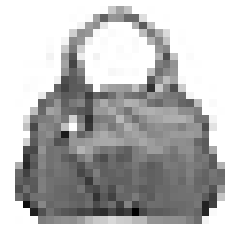

Our model predicted: Bag
The actual answer was: Bag


In [25]:
import random
rand = random.randint(0,9999)

plt.subplot()
plt.axis('off')
plt.imshow(test_images[rand], cmap=plt.cm.binary)
plt.show()

prediction = np.argmax(predictions[rand])
actual = class_names[test_labels[rand]]
print(f'Our model predicted: {class_names[prediction]}')
print(f'The actual answer was: {actual}')